# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [82]:
# Dependencies and Setup
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units=metric"

In [4]:
# This is a testing cell with one city to determine the layout of the json response

# Test URL to see layout of json response
barbados_weather = requests.get(f"{query_url}&q=Bridgetown").json()

# Print the json (pretty printed)
print(json.dumps(barbados_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 13.1,
        "lon": -59.6167
    },
    "dt": 1686410573,
    "id": 3374036,
    "main": {
        "feels_like": 38.27,
        "humidity": 70,
        "pressure": 1016,
        "temp": 31.27,
        "temp_max": 31.27,
        "temp_min": 31.27
    },
    "name": "Bridgetown",
    "sys": {
        "country": "BB",
        "id": 8772,
        "sunrise": 1686389494,
        "sunset": 1686435863,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 7.72
    }
}


In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
                
    # Create endpoint URL with each city
    city_url = f"{query_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # While collecting the date, convert it from Unix to UTC
        city_date = time.ctime(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bishoftu
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | odlabari
Processing Record 4 of Set 1 | paradip garh
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | revda
Processing Record 12 of Set 1 | cabedelo
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | broome
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | guateque
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | broken hill
Processing Record 19 of Set 1 | greymouth
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | coquimbo
Processing Record 22 of Set 1 | bilibino
Processing Record 23 

Processing Record 42 of Set 4 | shagonar
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | taro
Processing Record 45 of Set 4 | basciftlik
Processing Record 46 of Set 4 | yellowknife
Processing Record 47 of Set 4 | atamanovka
Processing Record 48 of Set 4 | papatowai
Processing Record 49 of Set 4 | praia da vitoria
Processing Record 0 of Set 5 | ongwediva
Processing Record 1 of Set 5 | ouani
Processing Record 2 of Set 5 | bemidji
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | dudinka
Processing Record 5 of Set 5 | patnanungan
Processing Record 6 of Set 5 | yung shue wan
Processing Record 7 of Set 5 | happy valley-goose bay
Processing Record 8 of Set 5 | port alfred
Processing Record 9 of Set 5 | port elizabeth
Processing Record 10 of Set 5 | nandgaon
Processing Record 11 of Set 5 | constantia
Processing Record 12 of Set 5 | puerto ayora
Processing Record 13 of Set 5 | sena madureira
Processing Record 14 of Set 5 | la passe
Processing Rec

City not found. Skipping...
Processing Record 35 of Set 8 | cidade velha
Processing Record 36 of Set 8 | barcelos
Processing Record 37 of Set 8 | labytnangi
Processing Record 38 of Set 8 | nabire
Processing Record 39 of Set 8 | mitu
Processing Record 40 of Set 8 | kingston
Processing Record 41 of Set 8 | tekeli
Processing Record 42 of Set 8 | sisimiut
Processing Record 43 of Set 8 | paulista florida
Processing Record 44 of Set 8 | pauini
Processing Record 45 of Set 8 | maun
Processing Record 46 of Set 8 | kudahuvadhoo
Processing Record 47 of Set 8 | erechim
Processing Record 48 of Set 8 | russkaya polyana
Processing Record 49 of Set 8 | pariaman
Processing Record 0 of Set 9 | polohy
Processing Record 1 of Set 9 | oum hadjer
Processing Record 2 of Set 9 | bogandinskiy
Processing Record 3 of Set 9 | weno
Processing Record 4 of Set 9 | benito juarez
Processing Record 5 of Set 9 | amga
Processing Record 6 of Set 9 | ebon
Processing Record 7 of Set 9 | todos santos
Processing Record 8 of Se

Processing Record 24 of Set 12 | dwarka
Processing Record 25 of Set 12 | wanning
Processing Record 26 of Set 12 | san luis de la loma
Processing Record 27 of Set 12 | san jose de feliciano
Processing Record 28 of Set 12 | mejit
Processing Record 29 of Set 12 | al 'amarah
Processing Record 30 of Set 12 | espargos
City not found. Skipping...
Processing Record 31 of Set 12 | armavir
Processing Record 32 of Set 12 | butte
Processing Record 33 of Set 12 | filadelfia
Processing Record 34 of Set 12 | kodinsk
Processing Record 35 of Set 12 | tshabong
Processing Record 36 of Set 12 | santa ana
Processing Record 37 of Set 12 | vuktyl
Processing Record 38 of Set 12 | gorodoviki
Processing Record 39 of Set 12 | san antonio de pale
Processing Record 40 of Set 12 | palmer
Processing Record 41 of Set 12 | zyryanskoye
Processing Record 42 of Set 12 | woodland park
Processing Record 43 of Set 12 | hobyo
Processing Record 44 of Set 12 | kaiyuan
Processing Record 45 of Set 12 | porvoo
Processing Record 4

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bishoftu,8.7500,38.9833,19.63,40,100,1.14,ET,Sat Jun 10 11:22:53 2023
1,port-aux-francais,-49.3500,70.2167,3.94,57,76,10.39,TF,Sat Jun 10 11:22:53 2023
2,odlabari,26.8333,88.6167,25.92,85,16,1.60,IN,Sat Jun 10 11:19:22 2023
3,paradip garh,20.3167,86.6167,32.21,49,100,4.35,IN,Sat Jun 10 11:22:54 2023
4,west island,-12.1568,96.8225,25.99,83,40,8.82,CC,Sat Jun 10 11:22:54 2023


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bishoftu,8.7500,38.9833,19.63,40,100,1.14,ET,Sat Jun 10 11:22:53 2023
1,port-aux-francais,-49.3500,70.2167,3.94,57,76,10.39,TF,Sat Jun 10 11:22:53 2023
2,odlabari,26.8333,88.6167,25.92,85,16,1.60,IN,Sat Jun 10 11:19:22 2023
3,paradip garh,20.3167,86.6167,32.21,49,100,4.35,IN,Sat Jun 10 11:22:54 2023
4,west island,-12.1568,96.8225,25.99,83,40,8.82,CC,Sat Jun 10 11:22:54 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

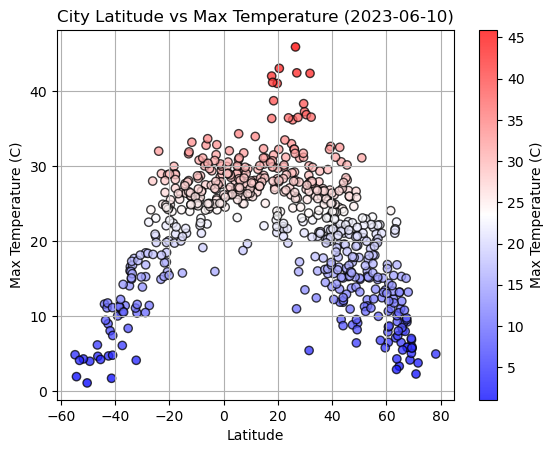

In [65]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
color_values = city_data_df["Max Temp"]  # Variable used for coloring

fig1 = plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75, c=color_values, cmap='bwr')
plt.colorbar(fig1, label='Max Temperature (C)')
              
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2023-06-10)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

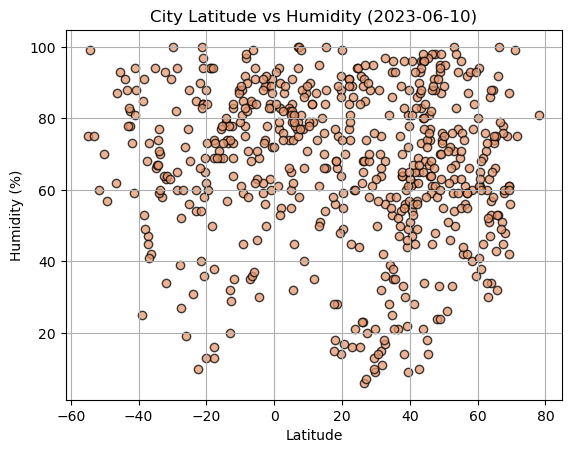

In [66]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
fig2 = plt.scatter(x_axis, y_axis, marker="o",facecolors="#e69870", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-06-10)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

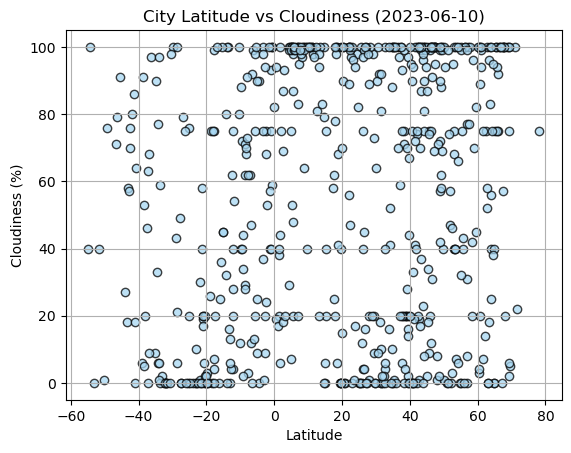

In [67]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
fig3 = plt.scatter(x_axis, y_axis, marker="o",facecolors="#a7d7f2", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-06-10)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

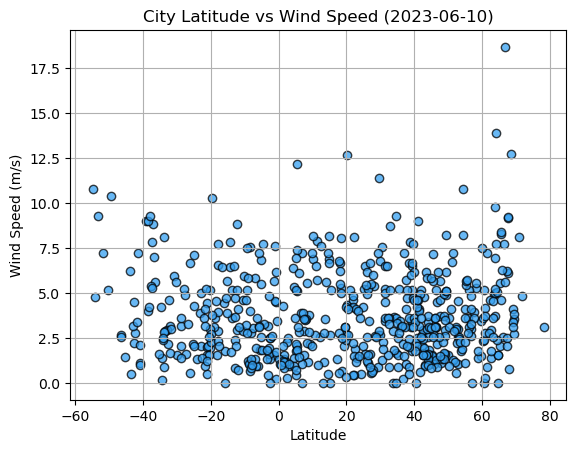

In [68]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
fig4 = plt.scatter(x_axis, y_axis, marker="o",facecolors="#35a1f2", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-06-10)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [116]:
# Define a function to create Linear Regression plots
#Note that this code is commented out so that it doesn't auto-generate a scatterplot based on most recent values

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
# plt.scatter(x_axis,y_axis)
# plt.plot(x_axis,regress_values,"r-")
# plt.annotate(line_eq,(-40,15), fontsize=15,color="red")
# print(f"The r value is {round(rvalue,2)} and r squared is {round(rvalue**2,2)}")

In [117]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bishoftu,8.7500,38.9833,19.63,40,100,1.14,ET,Sat Jun 10 11:22:53 2023
2,odlabari,26.8333,88.6167,25.92,85,16,1.60,IN,Sat Jun 10 11:19:22 2023
3,paradip garh,20.3167,86.6167,32.21,49,100,4.35,IN,Sat Jun 10 11:22:54 2023
5,lihue,21.9789,-159.3672,21.92,84,100,4.62,US,Sat Jun 10 11:22:54 2023
6,hawaiian paradise park,19.5933,-154.9731,21.13,92,40,2.57,US,Sat Jun 10 11:22:54 2023


In [118]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,3.94,57,76,10.39,TF,Sat Jun 10 11:22:53 2023
4,west island,-12.1568,96.8225,25.99,83,40,8.82,CC,Sat Jun 10 11:22:54 2023
7,adamstown,-25.0660,-130.1015,20.63,56,76,7.10,PN,Sat Jun 10 11:22:54 2023
8,ushuaia,-54.8000,-68.3000,4.81,75,40,10.80,AR,Sat Jun 10 11:22:54 2023
9,hermanus,-34.4187,19.2345,16.56,74,77,1.40,ZA,Sat Jun 10 11:22:54 2023


###  Temperature vs. Latitude Linear Regression Plot

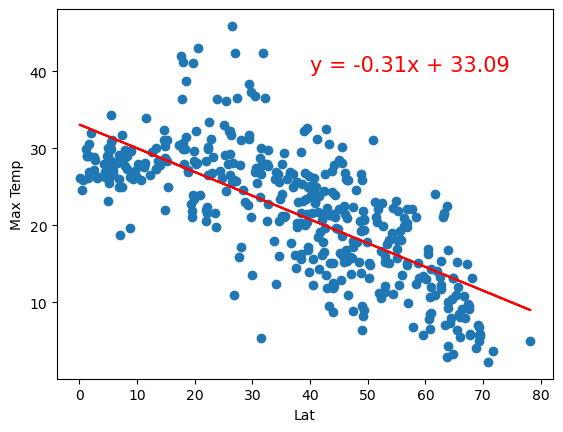

The r value is -0.72 and r squared is 0.52


In [138]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,40), fontsize=15,color="red")
plt.show()

print(f"The r value is {round(rvalue,2)} and r squared is {round(rvalue**2,2)}")

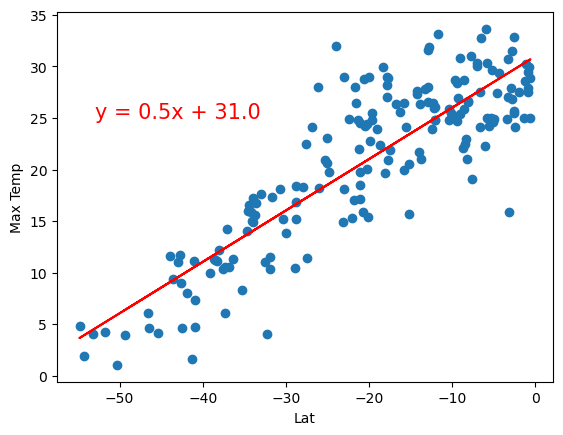

The r value is 0.86 and r squared is 0.75


In [139]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-53,25), fontsize=15,color="red")
plt.show()

print(f"The r value is {round(rvalue,2)} and r squared is {round(rvalue**2,2)}")

**Discussion about the linear relationship:** <br>
There is a clear oppositional relationship between the northern and southern hemispheres when assessing the correlation between latitude and maximum temperature. In both cases, as the latitude value approaches 0, the maximum temperature increases. As the latitude value gets further from 0, the maximum temperature increases. In the northern hemisphere, there is a negative correlation coefficient of -0.72 and in the southern hemisphere there is a positive correlation coefficient of 0.86. These both indicate strong and nearly opposite correlations, which supports the visual representation of the linear regression. 

### Humidity vs. Latitude Linear Regression Plot

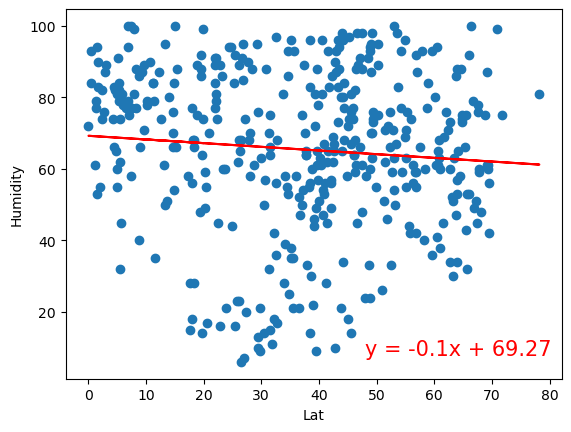

The r value is -0.09 and r squared is 0.01


In [151]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(48,8), fontsize=15,color="red")
plt.show()

print(f"The r value is {round(rvalue,2)} and r squared is {round(rvalue**2,2)}")

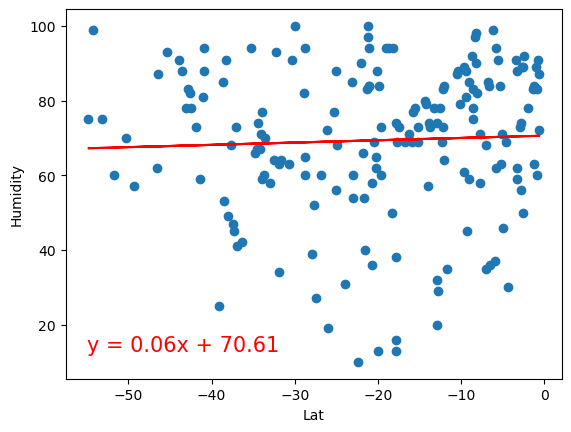

The r value is 0.04 and r squared is 0.0


In [154]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,13), fontsize=15,color="red")
plt.show()

print(f"The r value is {round(rvalue,2)} and r squared is {round(rvalue**2,2)}")

**Discussion about the linear relationship:** <br>
There does not appear to be a linear relationship between humidity and latitude. In addition to the line appearing nearly flat, the r values are extremely low and r squared is 0 which indicates there is little to no correlation in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

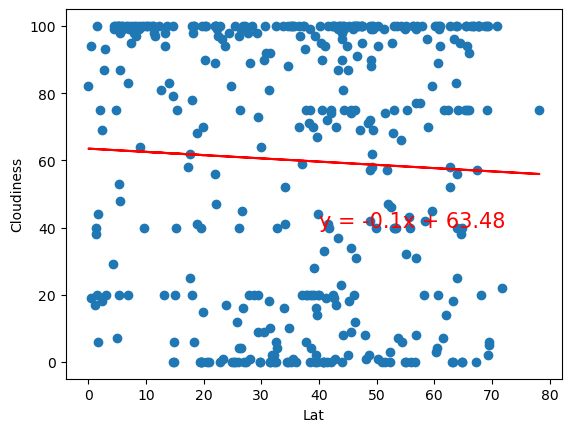

The r value is -0.05 and r squared is 0.0


In [143]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,40), fontsize=15,color="red")
plt.show()

print(f"The r value is {round(rvalue,2)} and r squared is {round(rvalue**2,2)}")

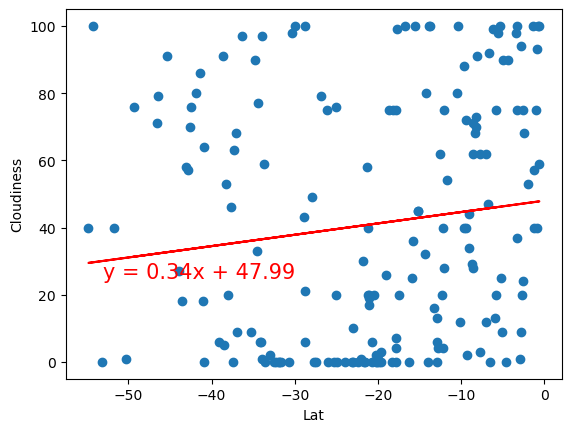

The r value is 0.13 and r squared is 0.02


In [145]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-53,25), fontsize=15,color="red")
plt.show()

print(f"The r value is {round(rvalue,2)} and r squared is {round(rvalue**2,2)}")

**Discussion about the linear relationship:** <br>
There appears to be a very weak correlation between latitude and cloudiness. The northern hemisphere displays a negligible negative correlation with an r of -0.05 and an r squared of 0. The southern hemisphere shows slightly higher values but, but in the context of overall correlation coefficient, they it is only a very weak positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

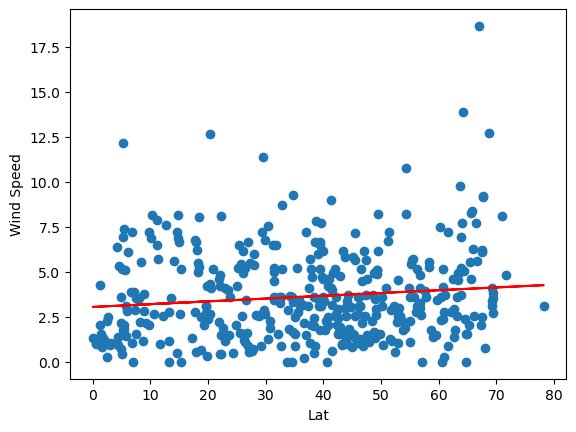

The r value is 0.12 and r squared is 0.01


In [155]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,40), fontsize=15,color="red")
plt.show()

print(f"The r value is {round(rvalue,2)} and r squared is {round(rvalue**2,2)}")

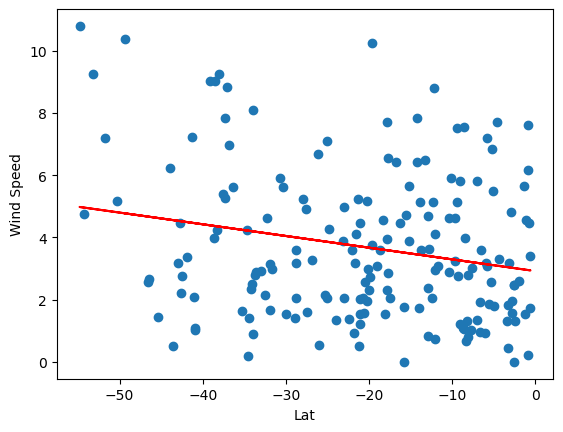

The r value is -0.22 and r squared is 0.05


In [156]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-53,25), fontsize=15,color="red")
plt.show()

print(f"The r value is {round(rvalue,2)} and r squared is {round(rvalue**2,2)}")

**Discussion about the linear relationship:** <br>
In the southern hemisphere, wind speeds marginally decrease closer to the equator which indicates a slight negative correlation. There is a weaker inverse correlation in the northern hemisphere. 